# AirBnb Data Analysis

### <font color = 'green'> **Problem-Statement**



<p>Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.</p>
<p>We have a data of 74111 Airbnb properties across the nations. Based on this data build multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.</p>


#### <font color = 'green'> **Attribute Information.**

- **id** - Property ID
- **room_type** - Type of Room in the property.
- **accommodates** - How many adults can this property accomodates.
- **bathrooms** - Number of bathrooms in the property.
- **cancellation_policy** - Cancellation policy of the property.
- **cleaning_fee** - This denotes whether propoerty cleaning fee is included in the rent or not.
- **instant_bookable** - It indicates whether instant booking facility is available or not.
- **review_scores_rating** - Review rating score of the property.
- **bedrooms** - Number of bedrooms in the property.
- **beds** - Total number of beds in the property.
- **log_price** - Log of rental price of the property for a fixed period.


### <font color = 'green'> **Import necessary libraries and read the dataset.**

In [450]:
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
import pandas as pd

In [451]:
ab = pd.read_csv(r"C:\Users\sania\Downloads\AirBNB-1.csv")

c:\users\sania\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



### <font color = 'green'> **Exploratory Data Analysis**


<font size=3> Perform Necessary Exploratory Data Analysis.

In [452]:
ab.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [453]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [454]:
ab.describe()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,2.123090e+07,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [455]:
ab.cov()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
id,3.698750e+13,-75177.953071,-13944.628038,14626.026100,-38984.581559,-66089.790649,-31316.551564
accommodates,-7.517795e+04,4.638006,0.634036,-0.287211,1.302183,2.189675,0.876916
bathrooms,-1.394463e+04,0.634036,0.338787,0.046369,0.293013,0.384081,0.148448
review_scores_rating,1.462603e+04,-0.287211,0.046369,61.411612,0.073451,-0.270607,0.478013
bedrooms,-3.898458e+04,1.302183,0.293013,0.073451,0.726157,0.758671,0.289366
beds,-6.608979e+04,2.189675,0.384081,-0.270607,0.758671,1.572872,0.397815
log_price,-3.131655e+04,0.876916,0.148448,0.478013,0.289366,0.397815,0.514654


In [456]:
ab.var(numeric_only = True)

id                      3.698750e+13
accommodates            4.638006e+00
bathrooms               3.387868e-01
review_scores_rating    6.141161e+01
bedrooms                7.261574e-01
beds                    1.572872e+00
log_price               5.146538e-01
dtype: float64

In [457]:
ab.std(numeric_only = True)

id                      6.081735e+06
accommodates            2.153603e+00
bathrooms               5.820540e-01
review_scores_rating    7.836556e+00
bedrooms                8.521487e-01
beds                    1.254142e+00
log_price               7.173938e-01
dtype: float64

In [458]:
ab.corr()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
id,1.000000,-0.005740,-0.003939,0.000307,-0.007522,-0.008665,-0.007178
accommodates,-0.005740,1.000000,0.505645,-0.017093,0.709275,0.810798,0.567580
bathrooms,-0.003939,0.505645,1.000000,0.010527,0.589935,0.525598,0.355425
review_scores_rating,0.000307,-0.017093,0.010527,1.000000,0.011134,-0.027330,0.091219
bedrooms,-0.007522,0.709275,0.589935,0.011134,1.000000,0.709415,0.473214
beds,-0.008665,0.810798,0.525598,-0.027330,0.709415,1.000000,0.442153
log_price,-0.007178,0.567580,0.355425,0.091219,0.473214,0.442153,1.000000


In [459]:
ab.shape

(74111, 11)

### <font color = 'green'> **Data Preparation for model buidling.**

<font size=3> Q. Encode Categorical Variables.

In [460]:
df = pd.DataFrame(ab)

In [461]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [462]:
df.tail()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000
74110,3534845,Entire home/apt,4.0,1.0,moderate,False,f,96.0,1.0,2.0,4.852030


In [463]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan],
      dtype=object)

In [469]:
df['room_type'].isna().sum()

0

In [465]:
df['room_type'].value_counts()['Entire home/apt']

41308

In [466]:
df['room_type'].value_counts()['Private room']

30635

In [467]:
df['room_type'].value_counts()['Shared room']

2163

In [468]:
df['room_type'].fillna('Entire home/apt', inplace= True)

In [470]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()  

df['RT'] = labelencoder.fit_transform(df.room_type) 

In [471]:
df.cancellation_policy.unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [472]:
df.cancellation_policy.isna().sum()

8

In [473]:
df.mode()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,RT
0,344,Entire home/apt,2.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635,0.0
1,941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
74106,21227196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74107,21227461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74108,21227973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74109,21228356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [474]:
df['cancellation_policy'].value_counts()['strict']

32500

In [475]:
df['cancellation_policy'].fillna('strict', inplace= True)

In [476]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()  

df['CP'] = labelencoder.fit_transform(df.cancellation_policy) 

In [477]:
df.cleaning_fee.unique()

array([True, False, nan], dtype=object)

In [482]:
df['cleaning_fee'].isna().sum()

0

In [481]:
df['cleaning_fee'].fillna('True', inplace= True)

In [483]:
df['cleaning_fee'].value_counts()['True']

4

In [484]:
df = pd.get_dummies(df, prefix=['CF'],columns = ['cleaning_fee'])

In [485]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,instant_bookable,review_scores_rating,bedrooms,beds,log_price,RT,CP,CF_False,CF_True,CF_True
0,6901257,Entire home/apt,3.0,1.0,strict,f,100.0,1.0,1.0,5.010635,0,2,0,1,0
1,6304928,Entire home/apt,7.0,1.0,strict,t,93.0,3.0,3.0,5.129899,0,2,0,1,0
2,7919400,Entire home/apt,5.0,1.0,moderate,t,92.0,1.0,3.0,4.976734,0,1,0,1,0
3,13418779,Entire home/apt,4.0,1.0,flexible,f,NaN,2.0,2.0,6.620073,0,0,0,1,0
4,3808709,Entire home/apt,2.0,1.0,moderate,t,40.0,0.0,1.0,4.744932,0,1,0,1,0


In [486]:
df.instant_bookable.unique()

array(['f', 't'], dtype=object)

In [495]:
df = pd.get_dummies(df, prefix=['IB'],columns = ['instant_bookable'])

In [496]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,review_scores_rating,bedrooms,beds,log_price,RT,CP,CF_False,CF_True,CF_True,IB_f,IB_t
0,6901257,Entire home/apt,3.0,1.0,strict,100.0,1.0,1.0,5.010635,0,2,0,1,0,1,0
1,6304928,Entire home/apt,7.0,1.0,strict,93.0,3.0,3.0,5.129899,0,2,0,1,0,0,1
2,7919400,Entire home/apt,5.0,1.0,moderate,92.0,1.0,3.0,4.976734,0,1,0,1,0,0,1
3,13418779,Entire home/apt,4.0,1.0,flexible,NaN,2.0,2.0,6.620073,0,0,0,1,0,1,0
4,3808709,Entire home/apt,2.0,1.0,moderate,40.0,0.0,1.0,4.744932,0,1,0,1,0,0,1


In [497]:
df['id'].isna().sum()

0

In [501]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,review_scores_rating,bedrooms,beds,log_price,RT,CP,CF_False,CF_True,CF_True,IB_f,IB_t
0,6901257,Entire home/apt,3.0,1.0,strict,100.0,1.0,1.0,5.010635,0,2,0,1,0,1,0
1,6304928,Entire home/apt,7.0,1.0,strict,93.0,3.0,3.0,5.129899,0,2,0,1,0,0,1
2,7919400,Entire home/apt,5.0,1.0,moderate,92.0,1.0,3.0,4.976734,0,1,0,1,0,0,1
3,13418779,Entire home/apt,4.0,1.0,flexible,NaN,2.0,2.0,6.620073,0,0,0,1,0,1,0
4,3808709,Entire home/apt,2.0,1.0,moderate,40.0,0.0,1.0,4.744932,0,1,0,1,0,0,1


In [512]:
df.accommodates.dtype

dtype('float64')

In [514]:
df['accommodates'].isna().sum()

0

In [513]:
df['accommodates']=df['accommodates'].fillna(3.155125)

In [516]:
df['bathrooms'].isna().sum()

0

In [515]:
df['bathrooms'] = df['bathrooms'].fillna(1.235272)

In [518]:
df['review_scores_rating'].isna().sum()

0

In [517]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(0)

In [519]:
df['bedrooms'].isna().sum()

92

In [520]:
df['bedrooms'] = df['bedrooms'].fillna(1.265797)

In [523]:
df['beds'].isna().sum()

0

In [522]:
df['beds'] = df['beds'].fillna(1.71086)

In [524]:
df['log_price'].isna().sum()

0

<font size=3> Q. Check for duplicate records and drop them.

In [525]:
duplicated_rows = df.duplicated()
duplicate_df = df[duplicated_rows]
print(duplicate_df)

Empty DataFrame
Columns: [id, room_type, accommodates, bathrooms, cancellation_policy, review_scores_rating, bedrooms, beds, log_price, RT, CP, CF_False, CF_True, CF_True, IB_f, IB_t]
Index: []


<font size=3> Q. Check for the presence of outliers and treat them with appropriate techniques.

In [592]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [593]:
IQR = Q3 - Q1

In [596]:
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)

In [597]:
lower_limit

id                     -8.948480e+06
accommodates           -1.000000e+00
bathrooms               1.000000e+00
review_scores_rating    5.150000e+01
bedrooms                1.000000e+00
beds                   -5.000000e-01
log_price               2.963187e+00
RT                     -1.500000e+00
CP                     -3.000000e+00
CF_False               -1.500000e+00
CF_True                -1.500000e+00
CF_True                 0.000000e+00
IB_f                   -1.500000e+00
IB_t                   -1.500000e+00
dtype: float64

In [609]:
df = df.drop(columns = 'room_type')

In [612]:
df.columns

Index(['id', 'accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price', 'RT', 'CP', 'CF_False', 'CF_True', 'CF_True',
       'IB_f', 'IB_t'],
      dtype='object')

In [604]:
new_df.columns

Index(['id', 'accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price', 'RT', 'CP', 'CF_False', 'CF_True', 'CF_True',
       'IB_f', 'IB_t'],
      dtype='object')

In [526]:
df['accommodates'].describe()

count    74111.000000
mean         3.155125
std          2.153559
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

c:\users\sania\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='accommodates'>

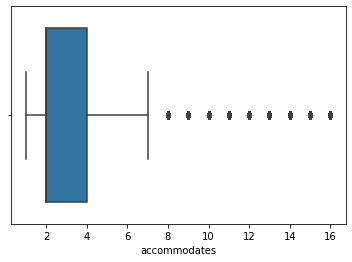

In [527]:
sns.boxplot(df['accommodates'])

In [528]:
Q1= df['accommodates'].quantile(0.25)
Q3= df['accommodates'].quantile(0.75)

In [529]:
IQR = Q3 - Q1
IQR

2.0

In [530]:
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

In [531]:
print("Upper_limit",upper_limit)
print("lower_limit",lower_limit)

Upper_limit 7.0
lower_limit -1.0


In [532]:
df[df['accommodates'] > upper_limit]

,id,room_type,accommodates,bathrooms,cancellation_policy,review_scores_rating,bedrooms,beds,log_price,RT,CP,CF_False,CF_True,CF_True,IB_f,IB_t
19,18224863,Entire home/apt,8.0,1.0,strict,72.0,3.0,3.0,4.595120,0,2,0,1,0,0,1
42,12428036,Private room,8.0,1.0,moderate,92.0,1.0,7.0,4.317488,1,1,0,1,0,0,1
62,11712092,Entire home/apt,9.0,2.5,flexible,0.0,4.0,4.0,6.907755,0,0,1,0,0,1,0
104,14900814,Entire home/apt,9.0,3.0,moderate,96.0,4.0,4.0,6.171701,0,1,0,1,0,0,1
109,235281,Entire home/apt,9.0,2.0,strict,96.0,2.0,5.0,5.293305,0,2,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74031,189787,Entire home/apt,8.0,5.0,strict,100.0,5.0,5.0,6.907755,0,2,0,1,0,1,0
74032,16659768,Entire home/apt,10.0,3.5,strict,89.0,3.0,4.0,5.616771,0,2,0,1,0,1,0
74042,16274884,Entire home/apt,8.0,1.5,strict,100.0,5.0,5.0,5.703782,0,2,0,1,0,1,0
74081,13996915,Entire home/apt,16.0,1.0,moderate,0.0,1.0,1.0,6.907755,0,1,1,0,0,0,1


In [533]:
df[df['accommodates'] < lower_limit]

,id,room_type,accommodates,bathrooms,cancellation_policy,review_scores_rating,bedrooms,beds,log_price,RT,CP,CF_False,CF_True,CF_True,IB_f,IB_t


In [534]:
new_df = df[df['accommodates'] < upper_limit]

In [535]:
new_df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,review_scores_rating,bedrooms,beds,log_price,RT,CP,CF_False,CF_True,CF_True,IB_f,IB_t
0,6901257,Entire home/apt,3.0,1.0,strict,100.0,1.0,1.0,5.010635,0,2,0,1,0,1,0
2,7919400,Entire home/apt,5.0,1.0,moderate,92.0,1.0,3.0,4.976734,0,1,0,1,0,0,1
3,13418779,Entire home/apt,4.0,1.0,flexible,0.0,2.0,2.0,6.620073,0,0,0,1,0,1,0
4,3808709,Entire home/apt,2.0,1.0,moderate,40.0,0.0,1.0,4.744932,0,1,0,1,0,0,1
5,12422935,Private room,2.0,1.0,strict,100.0,1.0,1.0,4.442651,1,2,0,1,0,0,1


In [536]:
new_df.shape

(69561, 16)

c:\users\sania\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='accommodates'>

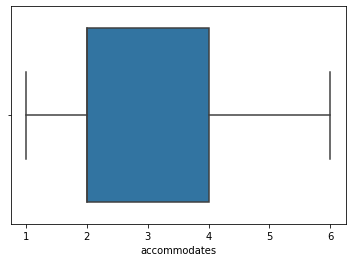

In [537]:
sns.boxplot(new_df['accommodates'])

In [538]:
df['bathrooms'].describe()

count    74111.000000
mean         1.235272
std          0.581256
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: bathrooms, dtype: float64

c:\users\sania\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms'>

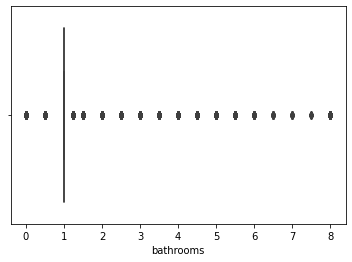

In [539]:
sns.boxplot(df['bathrooms'])

In [540]:
Q1= df['bathrooms'].quantile(0.25)
Q3= df['bathrooms'].quantile(0.75)

In [541]:
IQR = Q3 - Q1
IQR

0.0

In [542]:
df['bedrooms'].describe()

count    74111.000000
mean         1.265797
std          0.851620
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: bedrooms, dtype: float64

c:\users\sania\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

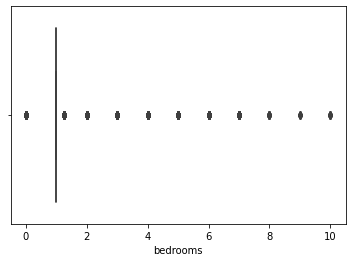

In [543]:
sns.boxplot(df['bedrooms'])

In [544]:
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)

In [545]:
IQR = Q3 - Q1
IQR

0.0

In [546]:
df['beds'].describe()

count    74111.000000
mean         1.710868
std          1.253033
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         18.000000
Name: beds, dtype: float64

c:\users\sania\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='beds'>

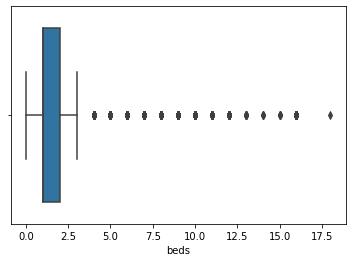

In [547]:
sns.boxplot(df['beds'])

In [548]:
Q1 = df['beds'].quantile(0.25)
Q3 = df['beds'].quantile(0.75)

In [549]:
IQR = Q3 - Q1
IQR

1.0

In [550]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [551]:
print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

Upper_limit 3.5
Lower_limit -0.5


In [552]:
df[df['beds']<lower_limit]

,id,room_type,accommodates,bathrooms,cancellation_policy,review_scores_rating,bedrooms,beds,log_price,RT,CP,CF_False,CF_True,CF_True,IB_f,IB_t


In [553]:
df[df['beds']>upper_limit]

,id,room_type,accommodates,bathrooms,cancellation_policy,review_scores_rating,bedrooms,beds,log_price,RT,CP,CF_False,CF_True,CF_True,IB_f,IB_t
42,12428036,Private room,8.0,1.0,moderate,92.0,1.0,7.0,4.317488,1,1,0,1,0,0,1
60,4274462,Entire home/apt,6.0,1.0,strict,100.0,2.0,4.0,4.828314,0,2,0,1,0,1,0
62,11712092,Entire home/apt,9.0,2.5,flexible,0.0,4.0,4.0,6.907755,0,0,1,0,0,1,0
81,13398011,Entire home/apt,6.0,1.0,strict,96.0,1.0,6.0,4.574711,0,2,0,1,0,0,1
104,14900814,Entire home/apt,9.0,3.0,moderate,96.0,4.0,4.0,6.171701,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74042,16274884,Entire home/apt,8.0,1.5,strict,100.0,5.0,5.0,5.703782,0,2,0,1,0,1,0
74045,15917355,Entire home/apt,7.0,3.5,strict,87.0,3.0,4.0,5.587249,0,2,0,1,0,1,0
74059,14912361,Entire home/apt,5.0,2.5,strict,95.0,3.0,4.0,5.416100,0,2,0,1,0,1,0
74102,7935934,Shared room,10.0,3.0,flexible,80.0,1.0,10.0,4.110874,2,0,1,0,0,1,0


In [554]:
new_df = df[df['beds']<upper_limit]

In [555]:
new_df.shape

(68425, 16)

c:\users\sania\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='beds'>

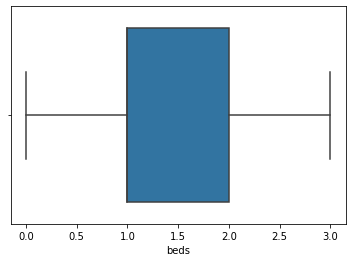

In [556]:
sns.boxplot(new_df['beds'])

In [557]:
df['log_price'].describe()

count    74111.000000
mean         4.782069
std          0.717394
min          0.000000
25%          4.317488
50%          4.709530
75%          5.220356
max          7.600402
Name: log_price, dtype: float64

c:\users\sania\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='log_price'>

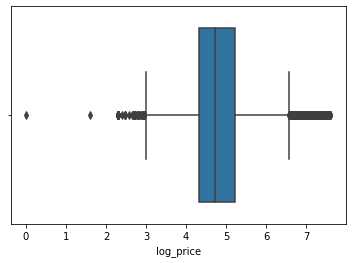

In [558]:
sns.boxplot(df['log_price'])

In [559]:
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)

In [560]:
IQR = Q3 - Q1
IQR

0.9028677110000007

In [561]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [562]:
print("Upper_limit", upper_limit)
print("lower_limit",lower_limit)

Upper_limit 6.5746573915000015
lower_limit 2.9631865474999985


In [563]:
df[df['log_price'] > upper_limit]

,id,room_type,accommodates,bathrooms,cancellation_policy,review_scores_rating,bedrooms,beds,log_price,RT,CP,CF_False,CF_True,CF_True,IB_f,IB_t
3,13418779,Entire home/apt,4.0,1.0,flexible,0.0,2.0,2.0,6.620073,0,0,0,1,0,1,0
24,2479317,Entire home/apt,4.0,1.0,moderate,0.0,1.0,2.0,6.956545,0,1,0,1,0,1,0
52,3530517,Entire home/apt,6.0,2.0,flexible,97.0,3.0,3.0,6.620073,0,0,0,1,0,0,1
62,11712092,Entire home/apt,9.0,2.5,flexible,0.0,4.0,4.0,6.907755,0,0,1,0,0,1,0
148,498052,Entire home/apt,2.0,1.0,flexible,0.0,1.0,1.0,7.150701,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73939,4456664,Entire home/apt,10.0,2.0,strict,93.0,4.0,5.0,6.731018,0,2,0,1,0,1,0
73953,17667639,Entire home/apt,8.0,3.0,strict,99.0,4.0,5.0,6.829794,0,2,0,1,0,1,0
73957,15219855,Entire home/apt,14.0,3.0,strict,98.0,4.0,6.0,6.684612,0,2,0,1,0,1,0
74031,189787,Entire home/apt,8.0,5.0,strict,100.0,5.0,5.0,6.907755,0,2,0,1,0,1,0


In [564]:
df[df['log_price'] < lower_limit]

,id,room_type,accommodates,bathrooms,cancellation_policy,review_scores_rating,bedrooms,beds,log_price,RT,CP,CF_False,CF_True,CF_True,IB_f,IB_t
165,2604409,Shared room,1.0,1.0,strict,100.0,1.0,1.0,2.944439,2,2,0,1,0,1,0
1307,12156285,Entire home/apt,3.0,1.0,flexible,0.0,0.0,2.0,2.484907,0,0,0,1,0,0,1
1658,17150899,Private room,3.0,1.0,flexible,0.0,1.0,2.0,2.890372,1,0,1,0,0,1,0
2725,3826037,Shared room,1.0,1.0,flexible,80.0,1.0,1.0,2.944439,2,0,1,0,0,0,1
3217,7038319,Shared room,1.0,1.0,moderate,0.0,1.0,1.0,2.890372,2,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71701,18007419,Private room,2.0,1.0,strict,93.0,1.0,1.0,2.708050,1,2,0,1,0,0,1
72166,5536023,Private room,2.0,1.0,flexible,83.0,1.0,1.0,2.944439,1,0,0,1,0,0,1
72320,14520685,Shared room,6.0,3.0,strict,81.0,1.0,8.0,2.708050,2,2,1,0,0,0,1
73576,15537228,Private room,1.0,1.0,flexible,91.0,1.0,1.0,2.708050,1,0,0,1,0,0,1


In [565]:
new_df = df[df['log_price'] < upper_limit]

In [566]:
new_df.shape

(72739, 16)

c:\users\sania\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='log_price'>

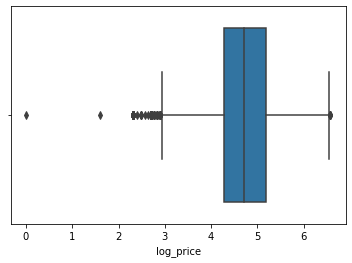

In [567]:
sns.boxplot(new_df['log_price'])

In [568]:
df['review_scores_rating'].describe()

count    74111.000000
mean        72.842520
std         39.920507
min          0.000000
25%         80.000000
50%         94.000000
75%         99.000000
max        100.000000
Name: review_scores_rating, dtype: float64

c:\users\sania\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='review_scores_rating'>

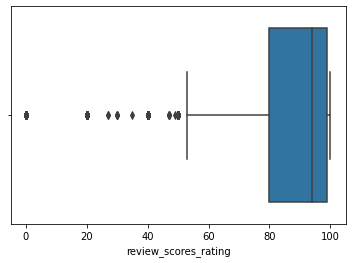

In [569]:
sns.boxplot(df['review_scores_rating'])

In [570]:
Q1 = df['review_scores_rating'].quantile(0.25)
Q3 = df['review_scores_rating'].quantile(0.75)

In [571]:
IQR = Q3 - Q1
IQR

19.0

In [572]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 + 1.5 * IQR

In [573]:
print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

Upper_limit 127.5
Lower_limit 108.5


In [574]:
df[df['review_scores_rating'] > upper_limit]

,id,room_type,accommodates,bathrooms,cancellation_policy,review_scores_rating,bedrooms,beds,log_price,RT,CP,CF_False,CF_True,CF_True,IB_f,IB_t


In [575]:
df[df['review_scores_rating'] < lower_limit]

,id,room_type,accommodates,bathrooms,cancellation_policy,review_scores_rating,bedrooms,beds,log_price,RT,CP,CF_False,CF_True,CF_True,IB_f,IB_t
0,6901257,Entire home/apt,3.0,1.0,strict,100.0,1.0,1.0,5.010635,0,2,0,1,0,1,0
1,6304928,Entire home/apt,7.0,1.0,strict,93.0,3.0,3.0,5.129899,0,2,0,1,0,0,1
2,7919400,Entire home/apt,5.0,1.0,moderate,92.0,1.0,3.0,4.976734,0,1,0,1,0,0,1
3,13418779,Entire home/apt,4.0,1.0,flexible,0.0,2.0,2.0,6.620073,0,0,0,1,0,1,0
4,3808709,Entire home/apt,2.0,1.0,moderate,40.0,0.0,1.0,4.744932,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,0.0,1.0,1.0,4.605170,1,0,1,0,0,1,0
74107,13281809,Entire home/apt,4.0,2.0,moderate,93.0,2.0,4.0,5.043425,0,1,0,1,0,1,0
74108,18688039,Entire home/apt,5.0,1.0,moderate,94.0,2.0,2.0,5.220356,0,1,0,1,0,0,1
74109,17045948,Entire home/apt,2.0,1.0,strict,0.0,0.0,2.0,5.273000,0,2,0,1,0,0,1


In [576]:
new_df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,review_scores_rating,bedrooms,beds,log_price,RT,CP,CF_False,CF_True,CF_True,IB_f,IB_t
0,6901257,Entire home/apt,3.0,1.0,strict,100.0,1.0,1.0,5.010635,0,2,0,1,0,1,0
1,6304928,Entire home/apt,7.0,1.0,strict,93.0,3.0,3.0,5.129899,0,2,0,1,0,0,1
2,7919400,Entire home/apt,5.0,1.0,moderate,92.0,1.0,3.0,4.976734,0,1,0,1,0,0,1
4,3808709,Entire home/apt,2.0,1.0,moderate,40.0,0.0,1.0,4.744932,0,1,0,1,0,0,1
5,12422935,Private room,2.0,1.0,strict,100.0,1.0,1.0,4.442651,1,2,0,1,0,0,1


In [ ]:
type('room_type')

In [ ]:
new_df = new_df.drop(columns='room_type')

In [ ]:
new_df = new_df.drop(columns='cancellation_policy')

<font size=3> Q. Split the dataset into two parts (i.e. 70% train and 30% test).

In [582]:
X = new_df.drop('log_price', axis=1)
y = new_df[['log_price']]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [583]:
y.isnull().sum()

log_price    0
dtype: int64

In [584]:
X.columns

Index(['id', 'accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms',
       'beds', 'RT', 'CP', 'CF_False', 'CF_True', 'CF_True', 'IB_f', 'IB_t'],
      dtype='object')

In [585]:
y.columns

Index(['log_price'], dtype='object')

In [586]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [587]:
regression_model.score(X_train,y_train)

0.5090697061808604

In [588]:
regression_model.score(X_test,y_test)

0.506943924898718

In [589]:
regression_model.coef_

array([[-4.57256787e-10,  7.18314253e-02,  9.23070316e-02,
        -1.52481050e-03,  1.38636870e-01, -4.00319605e-02,
        -6.03862494e-01,  1.68877010e-02, -2.69749794e-01,
        -2.86983544e-01,  5.56733338e-01,  2.95078001e-02,
        -2.95078001e-02]])

In [590]:
regression_model.intercept_

array([4.96182371])